In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
trees = pd.read_csv('../data/reforestree/field_data.csv')
trees = trees[["site", "X", "Y", "lon", "lat", "carbon"]]
trees.head()

,site,X,Y,lon,lat,carbon
0,Nestor Macias RGB,2761.628615,6831.070678,-79.576630,-2.181226,2.123249
1,Nestor Macias RGB,5067.141765,7729.961820,-79.576412,-2.181312,2.123249
2,Nestor Macias RGB,6025.223497,9026.909643,-79.576322,-2.181438,2.123249
3,Nestor Macias RGB,7803.490078,10637.681956,-79.576154,-2.181593,2.123249
4,Nestor Macias RGB,7531.400369,9648.963864,-79.576179,-2.181498,2.123249


In [96]:
# gps_error: {site: [lon_error, lat_error]}
gps_error_rgb = {"Flora Pluas RGB": [0.25, 0.66],
            "Nestor Macias RGB": [0.6, 0.53],
            "Manuel Macias RGB": [0.69, 0.30],
            "Leonor Aspiazu RGB": [0.47, 0.45],
            "Carlos Vera Arteaga RGB": [0.26, 0.59],
            "Carlos Vera Guevara RGB": [0.27, 0.65]}
gsd_scale_rgb = {"Flora Pluas RGB": 0.97,
            "Nestor Macias RGB": 1.10,
            "Manuel Macias RGB": 1.13,
            "Leonor Aspiazu RGB": 1.06,
            "Carlos Vera Arteaga RGB": 1.04,
            "Carlos Vera Guevara RGB": 1.19}

In [97]:
# gps_error: {site: [lon_error, lat_error]}
gps_error_ocn = {"Flora Pluas RGB": [2.20, 2.98],
            "Nestor Macias RGB": [2.36, 2.74],
            "Manuel Macias RGB": [4.15, 4.07],
            "Leonor Aspiazu RGB": [1.53, 0.82],
            "Carlos Vera Arteaga RGB": [1.17, 1.77],
            "Carlos Vera Guevara RGB": [1.19, 1.84]}
gsd_scale_ocn = {"Flora Pluas RGB": 2.08,
            "Nestor Macias RGB": 2.28,
            "Manuel Macias RGB": 2.39,
            "Leonor Aspiazu RGB": 2.27,
            "Carlos Vera Arteaga RGB": 2.25,
            "Carlos Vera Guevara RGB": 2.98}

### If error unit is in lat/long (unlikely) 

Min, Max:  -79.57670322 -79.57575595
Coeff:  [1.05830303e+07 8.42164649e+08]


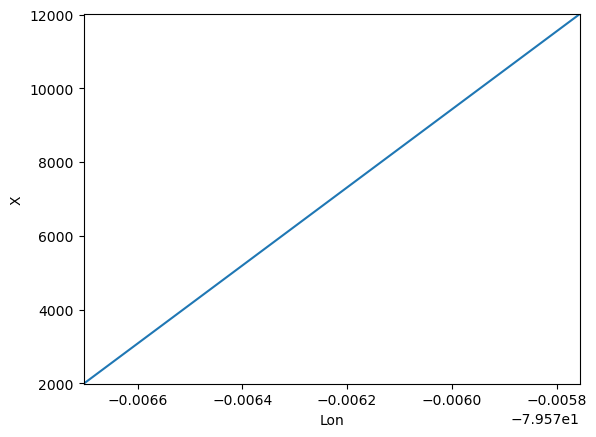

In [11]:
site = "Nestor Macias RGB"
trees_plot = trees[trees.site == site].sort_values(by="lon")
coeff = np.polyfit(trees_plot.lon, trees_plot.X, 1)
print("Min, Max: ", min(trees_plot.lon), max(trees_plot.lon))
print("Coeff: ", coeff)
plt.plot(trees_plot.lon, trees_plot.X)
x = np.linspace(min(trees_plot.lon), max(trees_plot.lon))
# plt.plot(x, x * coeff[0] + coeff[1], 'k', '--', alpha=0.5)
plt.xlabel("Lon")
plt.ylabel("X")
plt.axis([min(trees_plot.lon), max(trees_plot.lon), min(trees_plot.X), max(trees_plot.X)])
plt.show()

In [114]:
xy_error = {}
for site in gps_error_rgb.keys():
    trees_site = trees[trees.site == site].sort_values(by="lon")
    coeff_x = np.polyfit(trees_site.lon, trees_site.X, 1)
    trees_site = trees_site.sort_values(by="lat")
    coeff_y = np.polyfit(trees_site.lat, trees_site.Y, 1)
    # print(abs(coeff_x[0]), abs(coeff_y[0]))
    xy_error[site] = [abs(coeff_x[0] * gps_error_rgb[site][0]), abs(coeff_y[0] * gps_error_rgb[site][1])]
xy_error

{'Flora Pluas RGB': [27163819.110290322, 34413187.021811865],
 'Nestor Macias RGB': [24975951.496401798, 28388217.259482075],
 'Manuel Macias RGB': [41487923.18624139, 43070916.65154421],
 'Leonor Aspiazu RGB': [16588956.554062955, 8670348.20763275],
 'Carlos Vera Arteaga RGB': [12596742.391032916, 19718705.719189875],
 'Carlos Vera Guevara RGB': [12108659.568354886, 17142390.695371643]}

### If error unit is in m (more likely)

In [196]:
xy_error = {}
for site in gps_error_rgb.keys():
    gsd = gsd_scale_rgb[site]
    rgb = np.array([gps_error_rgb[site][0] * 100 /gsd, gps_error_rgb[site][1] * 100 /gsd])
    gsd = gsd_scale_ocn[site]
    ocn = np.array([gps_error_ocn[site][0] * 100 /gsd, gps_error_ocn[site][1] * 100 /gsd])
    xy_error[site] = rgb**2 + ocn**2
xy_error

{'Flora Pluas RGB': array([11851.38780319, 25155.68243313]),
 'Nestor Macias RGB': array([13689.27247799, 16763.62364516]),
 'Manuel Macias RGB': array([33879.46908175, 29704.49938781]),
 'Leonor Aspiazu RGB': array([6508.88090329, 3107.13906303]),
 'Carlos Vera Arteaga RGB': array([3329.        , 9406.82462196]),
 'Carlos Vera Guevara RGB': array([2109.42952974, 6795.98724076])}

## Create sample patches

In [113]:
patch_size = 2000
patches_array = []
for site in xy_error.keys():
    for x in range(8):
        for y in range(8):
            coordinates = np.array([(x,y), (x+1,y), (x+1,y+1), (x,y+1)]) * patch_size
            patches_array.append([site, coordinates])
patches = pd.DataFrame(patches_array, columns=["site", "vertices"])
patches.head()

,site,vertices
0,Flora Pluas RGB,"[[0, 0], [2000, 0], [2000, 2000], [0, 2000]]"
1,Flora Pluas RGB,"[[0, 2000], [2000, 2000], [2000, 4000], [0, 40..."
2,Flora Pluas RGB,"[[0, 4000], [2000, 4000], [2000, 6000], [0, 60..."
3,Flora Pluas RGB,"[[0, 6000], [2000, 6000], [2000, 8000], [0, 80..."
4,Flora Pluas RGB,"[[0, 8000], [2000, 8000], [2000, 10000], [0, 1..."


## Calculate by summing over numpy carbon distribution

In [111]:
# point mass
padding = 500

carbon_distributions = {}
for site in xy_error.keys():

    max_x = int(np.max(trees.X) + padding)
    max_y = int(np.max(trees.Y) + padding)

    carbon_distribution = np.zeros((max_y, max_x))
    trees_site = trees[trees.site == site]
    for x, y, carbon in zip(trees_site.X, trees_site.Y, trees_site.carbon):
        carbon_distribution[int(y), int(x)] = carbon

    carbon_distributions[site] = carbon_distribution

In [112]:
carbon_patches_2 = []
for idx_patch, patch in patches.iterrows():
    window = carbon_distributions[patch.site][patch.vertices[0][1]:patch.vertices[2][1], patch.vertices[0][0]:patch.vertices[2][0]]
    carbon_patch = np.sum(window)
    carbon_patches_2.append(carbon_patch)

## Gaussian Distribution

In [238]:
from scipy.stats import multivariate_normal
from tqdm import tqdm
# gaussian distribution

carbon_distributions = {}
for site in tqdm(xy_error.keys()):
    sigma_multiple = 10
    max_x_tree = int(sigma_multiple * np.sqrt(xy_error[site][0]))
    max_y_tree = int(sigma_multiple * np.sqrt(xy_error[site][1]))
    y_range, x_range = np.mgrid[0:max_y_tree, 0:max_x_tree]
    pos = np.dstack((y_range, x_range))
    rv = multivariate_normal([max_y_tree/2, max_x_tree/2], [[xy_error[site][1], 0], [0, xy_error[site][0]]])
    gaussian = rv.pdf(pos)

    padding = 300
    trees_site = trees[trees.site == site]
    max_x = int(np.max(trees_site.X) + padding)
    max_y = int(np.max(trees_site.Y) + padding)
    carbon_distribution = np.zeros((max_y, max_x))

    for idx, tree in trees_site.iterrows():
        gaussian_tree = gaussian * tree.carbon

        start_x = int(tree.X - max_x_tree/2)
        start_y = int(tree.Y - max_y_tree/2)
        end_x = int(tree.X + max_x_tree/2)
        end_y = int(tree.Y + max_y_tree/2)
        if (start_x < 0):
            gaussian_tree = gaussian_tree[:, abs(start_x):]
        if (start_y < 0):
            gaussian_tree = gaussian_tree[abs(start_y):, :]
        if (end_x > max_x):
            gaussian_tree = gaussian_tree[:, :max_x_tree - (end_x - max_x)]
        if (end_y > max_y):
            gaussian_tree = gaussian_tree[:max_y_tree - (end_y - max_y), :]

        carbon_distribution[max(start_y, 0):min(end_y, max_y), max(start_x, 0):min(end_x, max_x)] += gaussian_tree
    carbon_distributions[site] = carbon_distribution

100%|██████████| 6/6 [00:11<00:00,  1.92s/it]


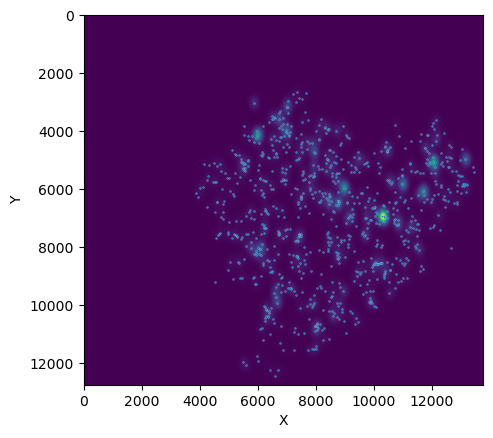

Carbon tree sum:  4763.539027023904
Carbon distribution sum:  4763.431737802279


In [239]:
import seaborn as sns
site = "Flora Pluas RGB"
ax = plt.gca()
plt.imshow(carbon_distributions[site])
sns.scatterplot(data=trees[trees.site == site], x="X", y="Y", legend=False, s=2)
plt.show()
print("Carbon tree sum: ", np.sum(trees[trees.site == site].carbon))
print("Carbon distribution sum: ", np.sum(carbon_distributions[site]))

In [240]:
carbon_patches = []
for idx_patch, patch in patches.iterrows():
    window = carbon_distributions[patch.site][patch.vertices[0][1]:patch.vertices[2][1], patch.vertices[0][0]:patch.vertices[2][0]]
    carbon_patch = np.sum(window)
    carbon_patches.append(carbon_patch)
patches['carbon'] = carbon_patches

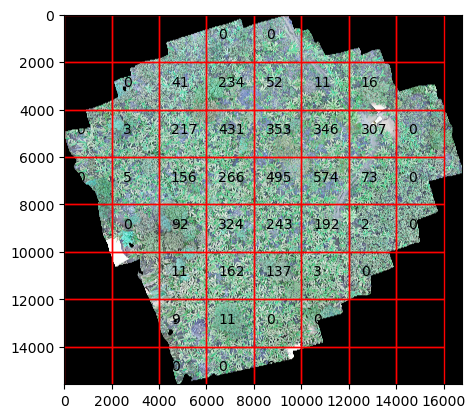

In [235]:
import cv2

site = "Flora Pluas RGB"
patches_site = patches[patches.site == site]

path = '../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site)
img = cv2.imread(path)
img = np.array(img)
ax = plt.gca()
plt.imshow(img)

for idx_patch, patch in patches_site.iterrows():
    vertices = np.array(patch.vertices)
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(patch_rec)

    center = (vertices[2] - vertices[0])/2 + vertices[0]
    plt.text(center[0] - 500, center[1], "{carbon:.0f}".format(carbon=patch.carbon))

plt.show()

## Calculate by checking each tree if inside patch

In [9]:
def in_rectangle(point, vertices):
    if point[0] >= vertices[0][0] and point[0] < vertices[1][0] and point[1] >= vertices[0][1] and point[1] < vertices[3][1]:
        return True
    return False

carbon_patches = []
tree_patch = {}
for idx_patch, patch in patches.iterrows():
    carbon_patch = 0
    for idx_tree, tree in trees[trees.site == patch.site].iterrows():
        point = np.array((tree.X, tree.Y))
        if in_rectangle(point, patch.vertices):
            carbon_patch += tree.carbon
            tree_patch[idx_tree] = idx_patch
    carbon_patches.append(carbon_patch)

patches['carbon'] = carbon_patches
trees.loc[list(tree_patch.keys()), 'patch'] = list(tree_patch.values())
trees.patch = [str(x) for x in trees.patch]

In [20]:
import cv2
import seaborn as sns

site = "Flora Pluas RGB"
patches_site = patches[patches.site == site]

path = '../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site)
img = cv2.imread(path)
img = np.array(img)
print(img.shape)

(15578, 16782, 3)


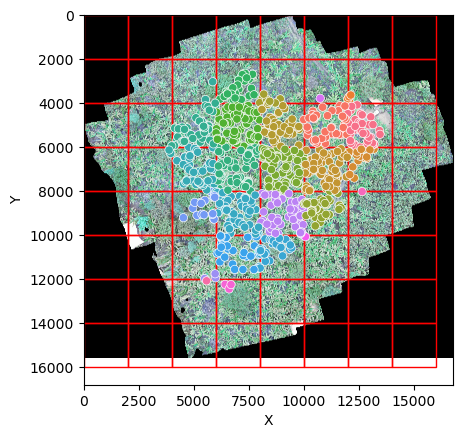

In [21]:
ax = plt.gca()
plt.imshow(img)

for idx_patch, patch in patches_site.iterrows():
    vertices = np.array([patch.a, patch.b, patch.c, patch.d])
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(patch_rec)
    
sns.scatterplot(data=trees[trees.site == site], x="X", y="Y", hue="patch", legend=False)

plt.show()

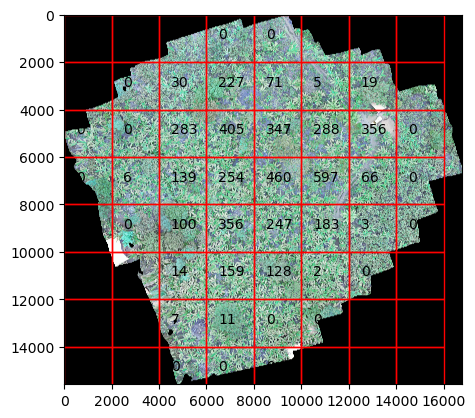

In [22]:
ax = plt.gca()
plt.imshow(img)

for idx_patch, patch in patches_site.iterrows():
    vertices = np.array([patch.a, patch.b, patch.c, patch.d])
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(patch_rec)

    center = (vertices[2] - vertices[0])/2 + vertices[0]
    plt.text(center[0] - 500, center[1], "{carbon:.0f}".format(carbon=patch.carbon))

plt.show()

In [27]:
patched_carbon_sum = patches[patches.site == site].carbon.sum()
print("patched_carbon_sum: ", patched_carbon_sum)

trees_carbon_sum = trees[trees.site == site].carbon.sum()
print("trees_carbon_sum: ", trees_carbon_sum)

patched_carbon_sum:  4763.539027023903
trees_carbon_sum:  4763.539027023904


# Backup Code (not used)

In [ ]:
'''
def in_rectangle(point, vertices):
    
    dot_products = [np.dot(point - vertices[0], vertices[1]-vertices[0]), np.dot(point - vertices[0], vertices[3]-vertices[0])]
    if np.any(dot_products < 0):
        return False
    if np.linalg.norm((point - vertices[0])) > np.linalg.norm((point - vertices[0]))
    
    p = point - vertices[0]
    x = vertices[1]-vertices[0]
    y = vertices[3]-vertices[0]
    p_x = (np.dot(p, x)/np.dot(x, x))*x
    p_y = (np.dot(p, y)/np.dot(y, y))*y

    print(p_x, p_y)
    print(np.linalg.norm(x - p_x))

    if np.linalg.norm(x - p_x) < 0 & np.linalg.norm(x - p_x) < 0:
        return False
    if 

vertices = np.array([[0, 0], [2000, 0], [2000, 2000], [0, 2000]])
point = np.array((1000, 2500))
in_rectangle(point, vertices)
'''

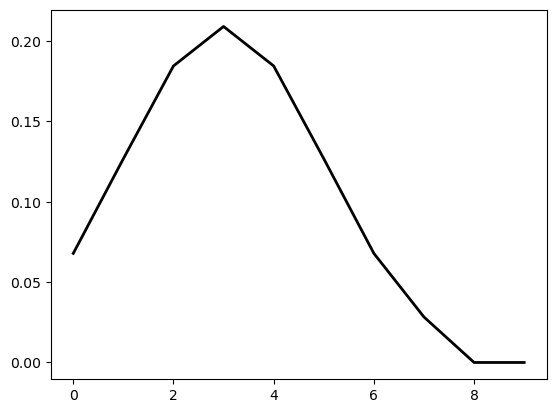

In [40]:
from scipy.stats import truncnorm
scale = 2
loc = 3
radius = 2 # multiple of sigma
a, b = -radius, radius
rv = truncnorm(a, b, loc=loc, scale=scale)

x = np.arange(0, 10)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [ ]:
'''
# multivariat truncated function
loc = np.array([3,4])
cov = np.array([[2,0], [0,3]])
a = np.array([0,1])
b = np.array([6,7])

np.exp(-0.5*(X - loc).T * np.invert(cov) * (X - loc)) 
'''

In [221]:
from scipy.stats import multivariate_normal
from tqdm import tqdm
# gaussian distribution
steps = 100

carbon_distributions = {}
# for site in tqdm(sites):
site = "Flora Pluas RGB"
trees_site = trees[trees.site == site]
max_x = int(np.max(trees_site.X)+ steps - np.max(trees_site.X)%steps)
max_y = int(np.max(trees_site.Y)+ steps - np.max(trees_site.Y)%steps)
y_range, x_range = np.mgrid[0:max_y:steps*1j, 0:max_x:steps*1j]
pos = np.dstack((y_range, x_range))
carbon_distribution = np.zeros((max_y, max_x))

for x, y, carbon in tqdm(zip(trees_site.X, trees_site.Y, trees_site.carbon)):
    rv = multivariate_normal([y, x], [[xy_error[site][1], 0], [0, xy_error[site][0]]])
    carbon_distribution_tree = np.repeat(np.repeat(rv.pdf(pos) * carbon, max_y/steps, axis=0), max_x/steps, axis=1)
    carbon_distribution = carbon_distribution + carbon_distribution_tree
carbon_distributions[site] = carbon_distribution

846it [10:18,  1.37it/s]


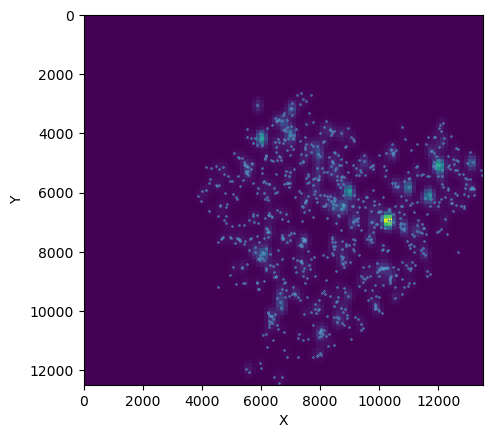

Carbon tree sum:  4763.539027023904
Carbon distribution sum:  4667.2372594426115


In [222]:
import seaborn as sns
site = "Flora Pluas RGB"
ax = plt.gca()
plt.imshow(carbon_distributions[site])
sns.scatterplot(data=trees[trees.site == site], x="X", y="Y", legend=False, s=2)
plt.show()
print("Carbon tree sum: ", np.sum(trees[trees.site == site].carbon))
print("Carbon distribution sum: ", np.sum(carbon_distribution))

## Plotting functions

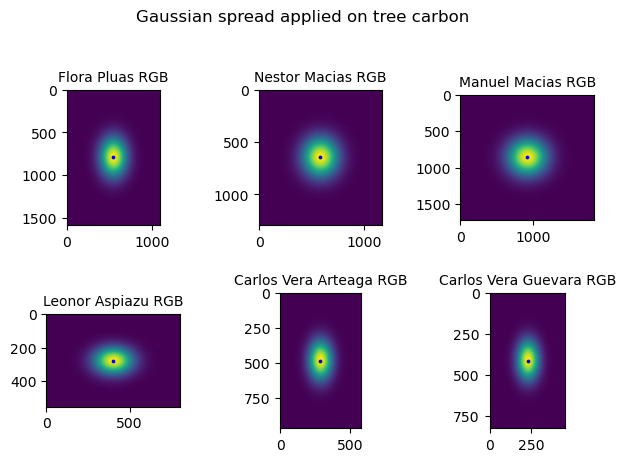

In [257]:
tree_gaussians = {}
for site in xy_error.keys():
    sigma_multiple = 10
    max_x_tree = int(sigma_multiple * np.sqrt(xy_error[site][0]))
    max_y_tree = int(sigma_multiple * np.sqrt(xy_error[site][1]))
    y_range, x_range = np.mgrid[0:max_y_tree, 0:max_x_tree]
    pos = np.dstack((y_range, x_range))
    rv = multivariate_normal([max_y_tree/2, max_x_tree/2], [[xy_error[site][1], 0], [0, xy_error[site][0]]])
    gaussian = rv.pdf(pos)
    tree_gaussians[site] = gaussian

fig, axs = plt.subplots(2, 3)
fig.suptitle("Gaussian spread applied on tree carbon")
for site, ax in zip(xy_error.keys(), axs.flat):
    ax.imshow(tree_gaussians[site])
    ax.scatter(tree_gaussians[site].shape[1]/2, tree_gaussians[site].shape[0]/2, s=3, c='b')
    ax.set_title(site, fontsize=10)
fig.tight_layout(pad=2)
plt.show()

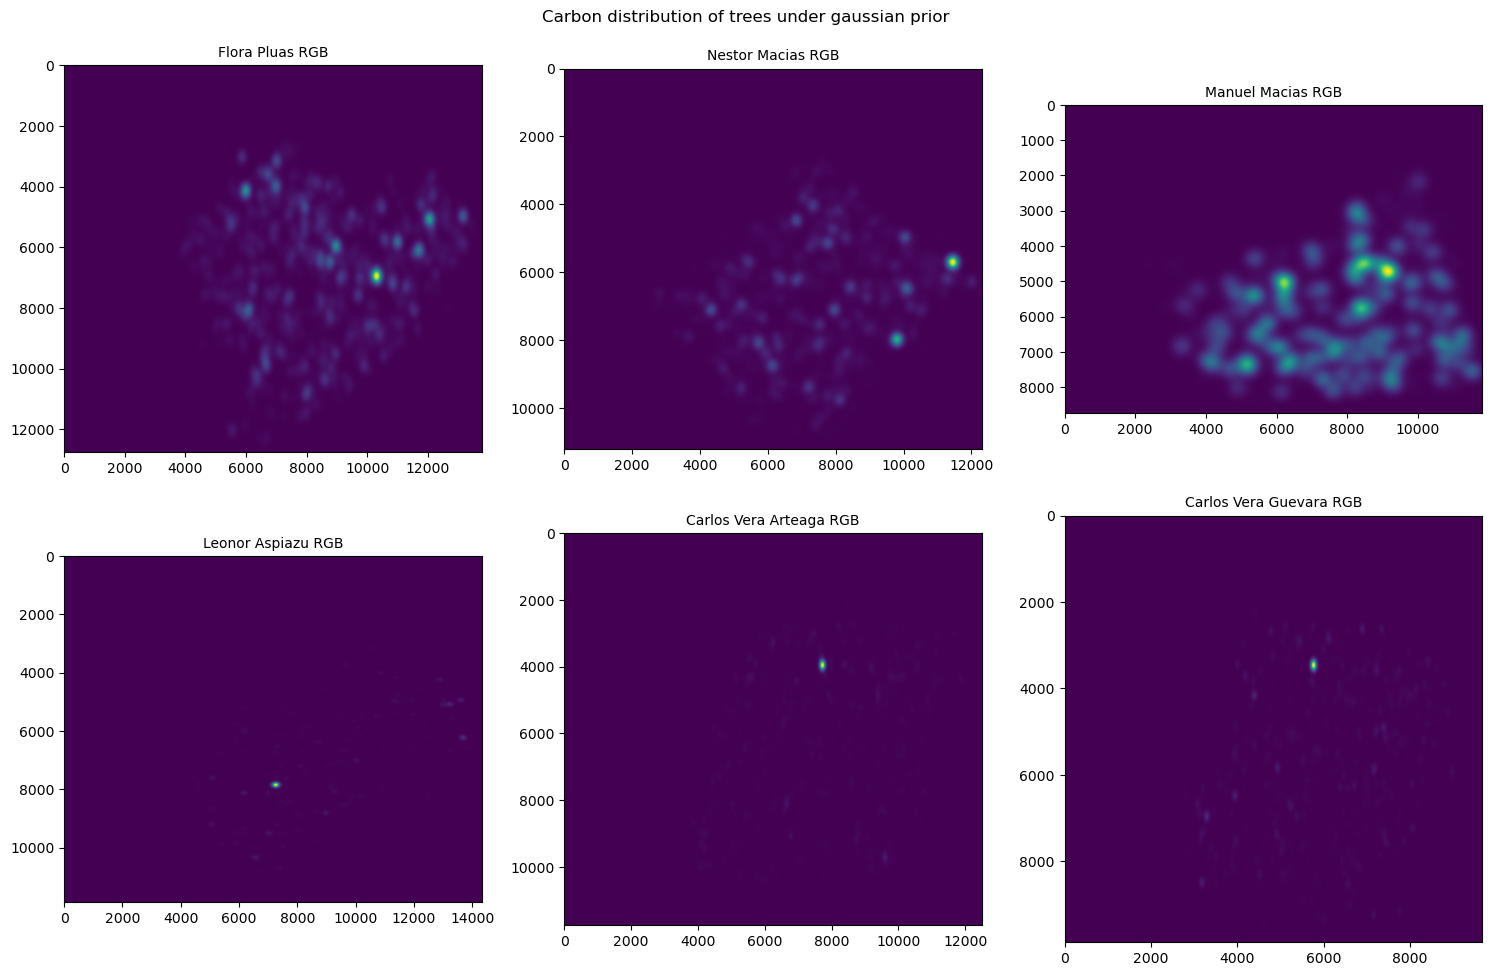

In [309]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle("Carbon distribution of trees under gaussian prior")
for site, ax in zip(xy_error.keys(), axs.flat):
    ax.imshow(carbon_distributions[site])
    trees_site = trees[trees.site == site]
    # ax.scatter(trees_site.X, trees_site.Y, s=0.5)
    ax.set_title(site, fontsize=10)
fig.tight_layout(pad=1)
plt.show()    

## Monster Trees

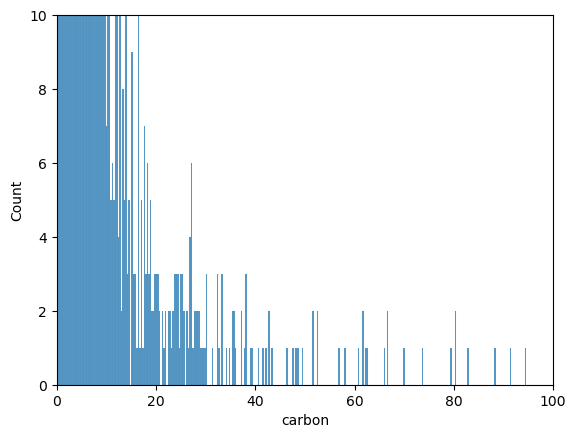

In [311]:
trees = pd.read_csv('../data/reforestree/field_data.csv')
sns.histplot(data=trees, x="carbon")
plt.ylim(0,10)
plt.xlim(0,100)
plt.show()

In [313]:
trees[trees.carbon > 100]

,name,lat,lon,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon
102,Guaba,-2.181253,-79.576139,21.772345,0.0,2016.0,P8,Nestor Macias RGB,7961.812211,7114.020391,21.772345,fruit,264.283326,103.070497
201,Melina,-2.181047,-79.575941,23.363891,0.0,2016.0,P8,Nestor Macias RGB,10052.489846,4981.070651,23.363891,timber,262.865796,102.517660
205,Pachaco,-2.181192,-79.575935,24.191495,0.0,2016.0,P8,Nestor Macias RGB,10118.422125,6479.636981,24.191495,timber,286.238142,111.632875
209,Teca,-2.181337,-79.575964,37.146677,0.0,2016.0,P8,Nestor Macias RGB,9811.514246,7983.590856,37.146677,timber,784.238541,305.853031
288,Teca,-2.181118,-79.575809,45.518207,0.0,2016.0,P8,Nestor Macias RGB,11453.788887,5711.704622,45.518207,timber,1238.159783,482.882315
708,Guaba,-2.181253,-79.576482,21.772345,0.0,2016.0,P8,Nestor Macias RGB,4333.631935,7110.290552,21.772345,fruit,264.283326,103.070497
862,Variedad bifurcada,-2.180999,-79.576244,28.894336,0.0,2016.0,P8,Nestor Macias RGB,6848.159933,4479.614550,28.894336,other,259.051834,101.030215
1156,Otra variedad,-1.150744,-79.579651,67.799847,0.0,2018.0,P2,Leonor Aspiazu RGB,7255.233079,7859.256625,67.799847,other,1725.128436,672.800090
1820,Guaba,-1.201238,-79.593196,41.380188,0.0,2017.0,P10,Carlos Vera Arteaga RGB,7729.135667,3948.314239,41.380188,fruit,1439.899249,561.560707
2757,Mango,-1.198239,-79.591190,48.064680,0.0,2016.0,P3,Carlos Vera Guevara RGB,5749.628850,3471.295406,48.064680,fruit,2138.064467,833.845142


site      Leonor Aspiazu RGB
X                7255.233079
Y                7859.256625
lon               -79.579651
lat                -1.150744
carbon             672.80009
Name: 1156, dtype: object


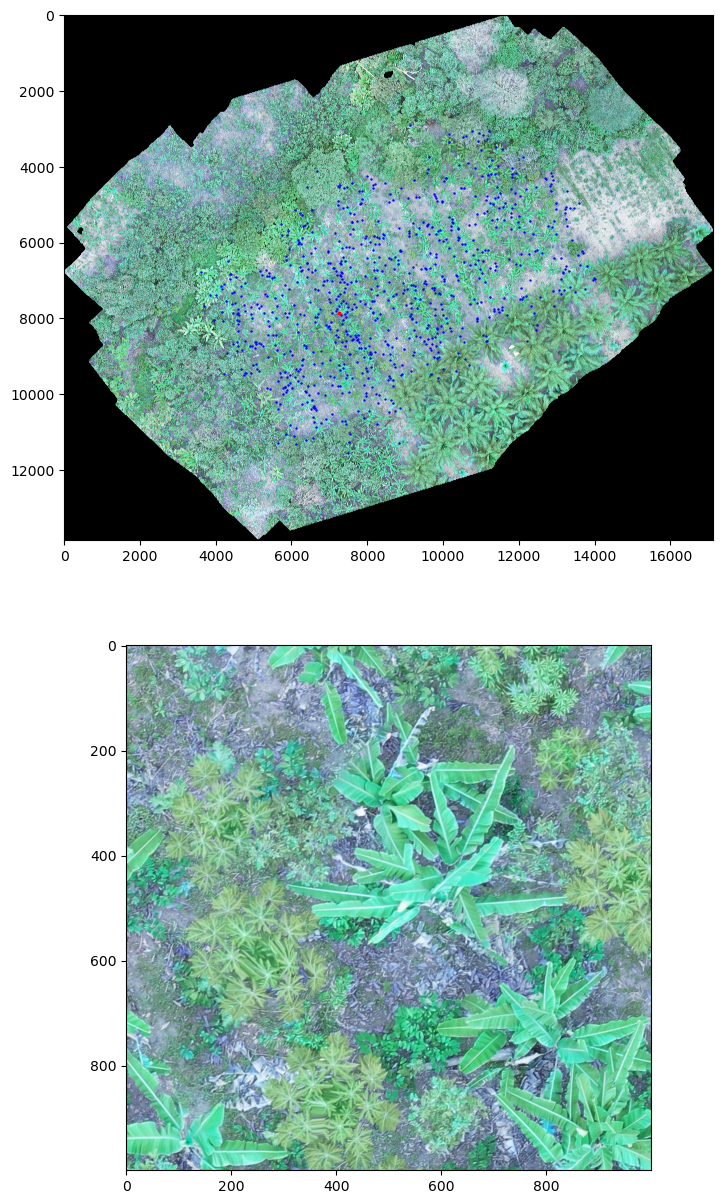

In [307]:
import cv2
import seaborn as sns

site = "Leonor Aspiazu RGB"
trees_site = trees[trees.site == site]
monster_tree = trees_site[trees_site.carbon > 100].iloc[0]
print(monster_tree)

path = '../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site)
img = cv2.imread(path)
img = np.array(img)

fig, axs = plt.subplots(2, 1, figsize=(10,15))
axs = axs.flat

axs[0].imshow(img)
axs[0].scatter(trees_site.X, trees_site.Y, s=0.5, c='b')
axs[0].scatter(monster_tree.X, monster_tree.Y, s=3, c='r')

axs[1].imshow(img[int(monster_tree.Y-500):int(monster_tree.Y+500), int(monster_tree.X-500):int(monster_tree.X+500)])
plt.savefig("monster_tree.png", dpi=300)
plt.show()